In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [12]:
df = pd.read_csv("BTC-USD.csv")
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2.595000e+03
mean,9642.525173,9916.392472,9350.424625,9665.155574,9665.155574,1.383543e+10
std,14197.464970,14622.261627,13733.769813,14231.537996,14231.537996,1.990956e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,578.477508,583.874024,573.849029,578.970001,578.970001,7.434920e+07
50%,5578.580078,5774.819824,5418.263184,5590.689941,5590.689941,4.627150e+09
75%,9731.806152,9938.556641,9539.721191,9749.141602,9749.141602,2.247845e+10
max,66002.234375,66930.390625,63610.675781,65992.835938,65992.835938,3.509679e+11


In [13]:
midrange = df["Low"] + (df["High"] - df["Low"]) / 2
df["Midrange"] = midrange


In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Midrange
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,460.298004
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,434.981994
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,406.183502
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,406.589493
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,402.803497


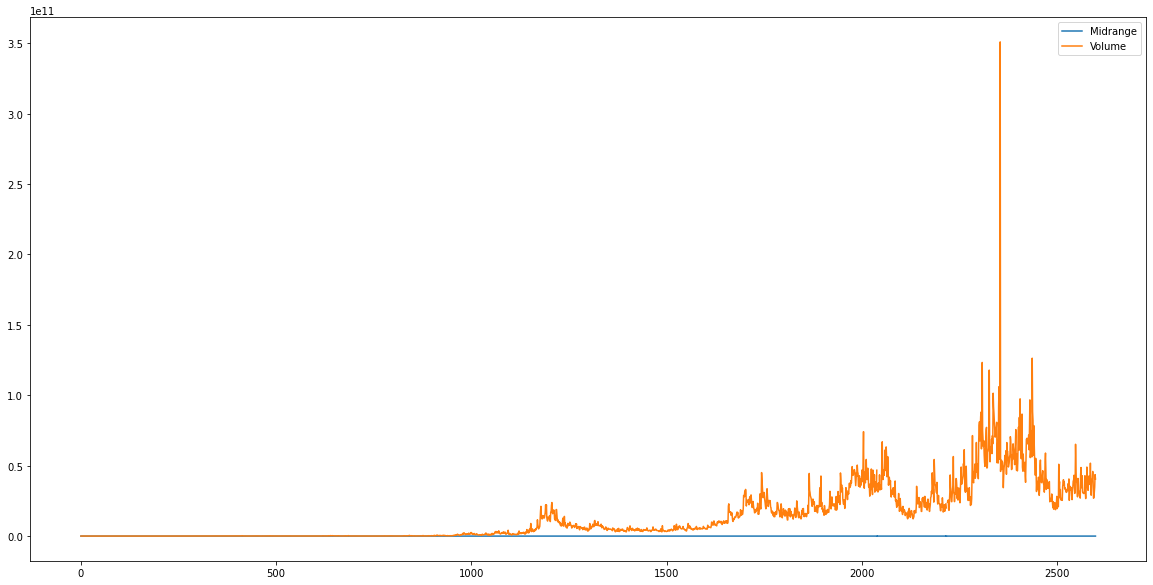

In [15]:
df = df[["Midrange", "Volume"]]
df.plot(figsize=(20, 10))

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np 

# data cleaner
df = df.dropna()

# data processor
X = np.asarray(df["Midrange"]).reshape(-1, 1) 
y = df["Volume"]

# model 
r = LinearRegression()
r = r.fit(X, y)

In [23]:
# interface 
xi = input("Please enter a midrange value: ")
xi = [[float(xi)]]
yp = r.predict(xi)
print(f"The predicted volume for a midrange value of {xi} is {yp}")

The predicted volume for a midrange value of [[410.0]] is [3.93962068e+09]


In [25]:
from sklearn.metrics import mean_squared_error
yp = r.predict(X)
acc = mean_squared_error(y_pred=yp, y_true=y)
print(f"The accuracy of our model is {acc}")

The accuracy of our model is 1.65053487660355e+20


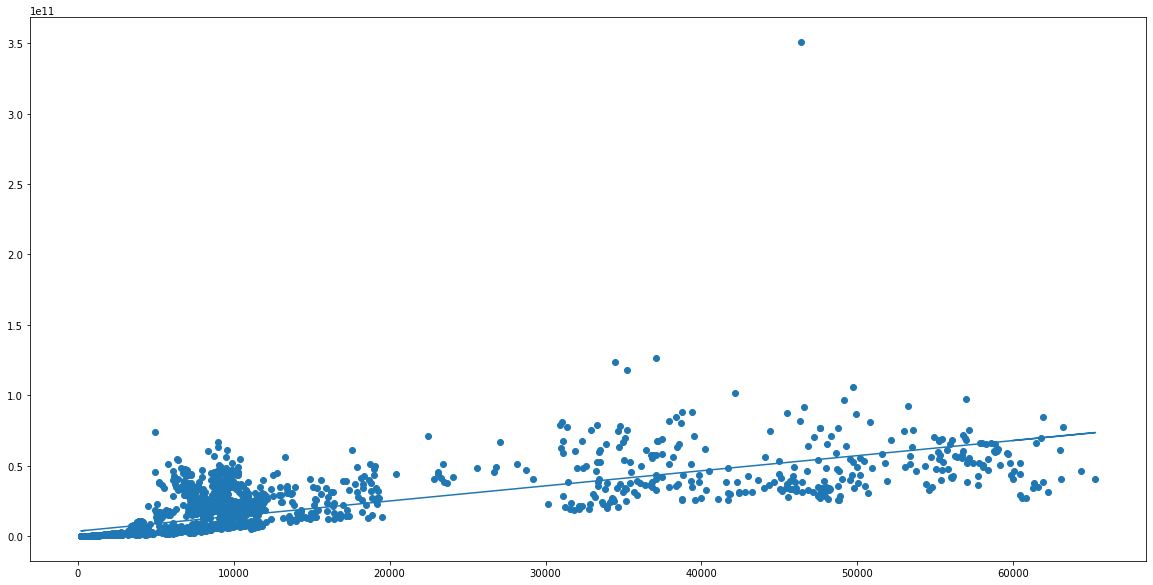

In [27]:
figure = plt.figure(figsize=(20, 10))
plt.plot(X, yp)
plt.scatter(X, y)
plt.show()

In [28]:
df["Midrange2"] = df["Midrange"] ** 2
df["Midrange3"] = df["Midrange"] ** 3
df.head()

,Midrange,Volume,Midrange2,Midrange3
0,460.298004,21056800.0,211874.252486,9.752530e+07
1,434.981994,34483200.0,189209.335539,8.230265e+07
2,406.183502,37919700.0,164985.037297,6.701420e+07
3,406.589493,36863600.0,165315.015818,6.721535e+07
4,402.803497,26580100.0,162250.657598,6.535513e+07


In [30]:
X = df[["Midrange", "Midrange2", "Midrange3"]]
y = df["Volume"]

r2 = LinearRegression()
r2 = r2.fit(X, y)

In [31]:
yp2 = r2.predict(X)
acc2 = mean_squared_error(y_pred=yp2, y_true=y)
print(f"The accuracy of our model is {acc2}")

The accuracy of our model is 1.3954396335061796e+20


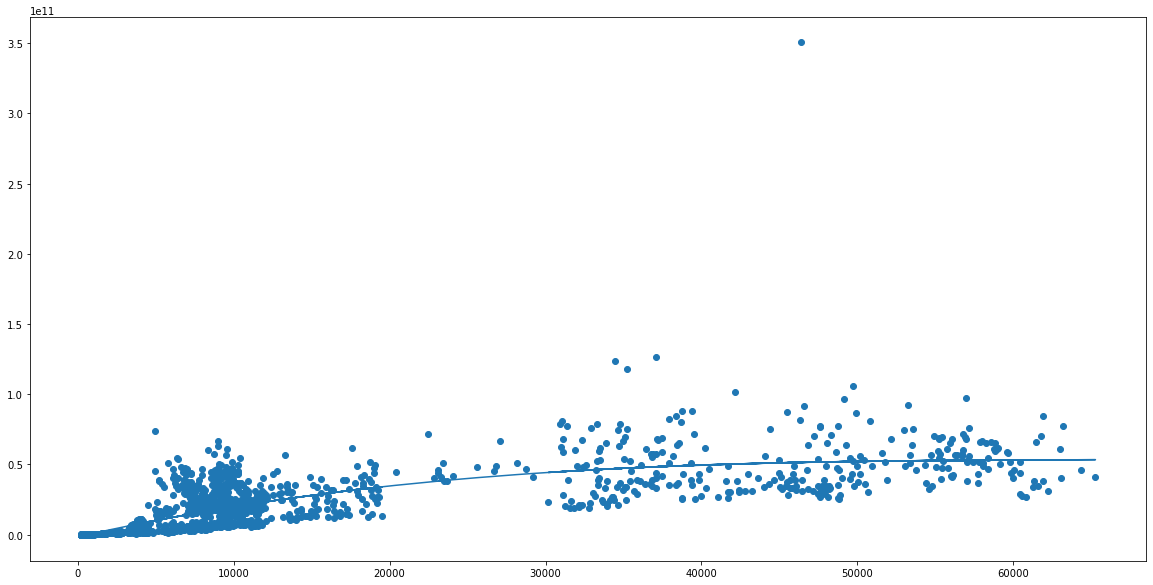

In [35]:
figure = plt.figure(figsize=(20, 10))
plt.plot(X["Midrange"], yp2)
plt.scatter(X["Midrange"], y)
plt.show()